In [1]:
import difflib as df
import csv
import pandas as pd
import numpy as np
import re
import pathlib
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
import math
from math import ceil
import seaborn as sns
from scipy import stats as st
from geopy import GoogleV3
#import folium
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('123_2.xlsx', sheet_name='ИТОГО_штуки')

# print whole sheet data
display(df.head(10))

,Unnamed: 0,Unnamed: 1,Unnamed: 2,ФАКТ ПРОДАЖИ 2019-2020,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,6529.1,6564.1,6617.1,6716.1,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,СУММА ПРОДАЖ в ЦО с учетом скидки на оборудование,NaN,NaN,NaN,NaN,NaN,NaN,...,2393.146558,2489.546579,2910.581726,2061.676058,1477.29655,2359.638412,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,СУММА ПРОДАЖ РРЦ СО СКИДКОЙ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,штуки из прогноза,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,ШТУКИ,NaN,NaN,NaN,NaN,NaN,NaN,...,21.28,20.73,27.46,17.49,12.81000,22.776263,NaN,NaN,NaN,NaN
6,Аббревиатура,код Вектор,код Тандер,НАИМЕНОВАНИЕ,Статус,Признак позиции,Категории для разграничения,Категория,Категория подробная,Коллекция,...,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2019.00000,2020.000000,NaN,NaN,Количество ТТ по новинкам 11.2020,NaN
7,HYDR КРЕМ-Г,SS730101004,1000304734,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ КРЕМ...,базовый,действующий,Лицо,Умывание,Очищение,HYDROGEN,...,0.67,1.66,0.74,0.53,0.30000,0.729167,5072.125,NaN,NaN,50447.0
8,HYDR ТОНИК,SS730101006,1000304737,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ ТОНИ...,базовый,действующий,Лицо,Тоник,Очищение,HYDROGEN,...,1.05,1.53,0.53,0.3,0.29000,0.699167,6618.125,NaN,NaN,47768.0
9,HYDR ДЕНЬ,SS730102001,1000304738,STELLARY SKIN STUDIO HYDROGEN ДНЕВНОЙ КРЕМ ДЛЯ...,базовый,действующий,Лицо,Кремы уход,Крем для лица,HYDROGEN,...,0.6,1.52,1.42,0.54,0.38000,0.591667,6570.875,NaN,NaN,40075.0


In [3]:
df = df[6:]
df.columns = df.iloc[0]
df = df[1:]
df = df.fillna(0)
df = df.reset_index(drop = True)
df = df[:34]
df

6,Аббревиатура,код Вектор,код Тандер,НАИМЕНОВАНИЕ,Статус,Признак позиции,Категории для разграничения,Категория,Категория подробная,Коллекция,...,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2019.0,2020.0,NaN,NaN,Количество ТТ по новинкам 11.2020,NaN
0,HYDR КРЕМ-Г,SS730101004,1000304734,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ КРЕМ...,базовый,действующий,Лицо,Умывание,Очищение,HYDROGEN,...,0.67,1.66,0.74,0.53,0.300,0.729167,5072.125000,0.0,0,50447.0
1,HYDR ТОНИК,SS730101006,1000304737,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ ТОНИ...,базовый,действующий,Лицо,Тоник,Очищение,HYDROGEN,...,1.05,1.53,0.53,0.30,0.290,0.699167,6618.125000,0.0,0,47768.0
2,HYDR ДЕНЬ,SS730102001,1000304738,STELLARY SKIN STUDIO HYDROGEN ДНЕВНОЙ КРЕМ ДЛЯ...,базовый,действующий,Лицо,Кремы уход,Крем для лица,HYDROGEN,...,0.60,1.52,1.42,0.54,0.380,0.591667,6570.875000,0.0,0,40075.0
3,HYDR НОЧЬ,SS730102002,1000304739,STELLARY SKIN STUDIO HYDROGEN НОЧНОЙ КРЕМ ДЛЯ ...,базовый,действующий,Лицо,Кремы уход,Крем для лица,HYDROGEN,...,0.43,1.09,1.18,0.41,0.230,0.382500,5391.250000,0.0,0,25772.0
4,HYDR КАПС,SS730103003,1000304740,STELLARY SKIN STUDIO HYDROGEN КАПСУЛЫ-ФИЛЛЕРЫ ...,базовый,действующий,Лицо,Маски-саше прочие,Спец уход,HYDROGEN,...,0.37,0.88,0.34,0.23,0.270,0.733333,3868.500000,0.0,0,49805.0
5,HYDR ПУЗ,SS730103001,1000304741,STELLARY SKIN STUDIO HYDROGEN ПУЗЫРЬКОВАЯ ТКАН...,базовый,действующий,Лицо,Маски-саше тканевые,Спец уход,HYDROGEN,...,1.98,0.62,1.63,0.57,1.070,1.435000,7108.625000,0.0,0,96242.0
6,HYDR УВЛ,SS730103002,1000304742,STELLARY SKIN STUDIO HYDROGEN ТКАНЕВАЯ МАСКА Д...,базовый,действующий,Лицо,Маски-саше тканевые,Спец уход,HYDROGEN,...,1.79,0.58,1.65,0.58,1.100,1.121667,7263.125000,0.0,0,73439.0
7,SUP МАСЛО,SS730201001,1000304743,STELLARY SKIN STUDIO SUPERFOOD ГИДРОФИЛЬНОЕ МА...,базовый,действующий,Лицо,Прочее,Очищение,SUPERFOOD,...,0.63,0.74,0.94,0.87,0.155,0.541667,4354.625000,0.0,0,37895.0
8,SUP ГЕЛЬ,SS730201002,1000304744,STELLARY SKIN STUDIO SUPERFOOD УЛЬТРАМЯГКИЙ ГЕ...,базовый,действующий,Лицо,Умывание,Очищение,SUPERFOOD,...,0.92,1.03,1.44,1.34,0.315,1.074167,5707.750000,0.0,0,75201.0
9,SUP ЛОСЬ,SS730201003,1000304745,STELLARY SKIN STUDIO SUPERFOOD УЛЬРАМЯГКИЙ ЛОС...,базовый,действующий,Лицо,Прочее,Очищение,SUPERFOOD,...,1.06,1.25,1.51,1.51,0.295,0.944167,6735.750000,0.0,0,65794.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Аббревиатура                       34 non-null     object 
 1   код Вектор                         34 non-null     object 
 2   код Тандер                         34 non-null     int64  
 3   НАИМЕНОВАНИЕ                       34 non-null     object 
 4   Статус                             34 non-null     object 
 5   Признак позиции                    34 non-null     object 
 6   Категории для разграничения        34 non-null     object 
 7   Категория                          34 non-null     object 
 8   Категория подробная                34 non-null     object 
 9   Коллекция                          34 non-null     object 
 10  2019-11-01 00:00:00                34 non-null     float64
 11  ЦО 10.01.2020                      34 non-null     float64
 

In [5]:
df.columns = ['Аббревиатура',
                'код Вектор',
                'код Тандер',
                'НАИМЕНОВАНИЕ',
                'Статус',
                'Признак позиции',
                'Категории для разграничения',
                'Категория',
                'Категория подробная',
                'Коллекция',
                "1",
                '2',
                '3',
                "4",
                "5",
                "2019-11-01",
                "2019-12-01",
                "2020-01-01",
                "2020-02-01",
                "2020-03-01",
                "2020-04-01",
                "2020-05-01",
                "2020-06-01",
                "2020-07-01",
                "2020-08-01",
                "2020-09-01",
                "2020-10-01",
                "2020-11-01",
                "2020-12-01",
                "2021-01-01",
                "2021-02-01",
                "2021-03-01",
                "2021-04-01",
                "2021-05-01",
                "2021-06-01",
                "2021-07-01",
                "2021-08-01",
                "2021-09-01",
                "2019-11-01",
                "2019-12-01",
                "2020-01-01",
                "2020-02-01",
                "2020-03-01",
                "2020-04-01",
                "2020-05-01",
                "2020-06-01",
                "2020-07-01",
                "2020-08-01",
                "2020-09-01",
                "2020-10-01",
                "2020-11-01",
                "2020-12-01",
                "2021-01-01",
                "2021-02-01",
                "2021-03-01",
                "2021-04-01",
                "2021-05-01",
                "2021-06-01",
                "2021-07-01",
                "2021-08-01",
                "2021-09-01",
                "6",
                "7",
                "8",
                "9",
                '10',
                "11"]

In [6]:
df = df.drop(columns = ['1','2','3','4','5','6','7','8','9','10','11'])
df

,Аббревиатура,код Вектор,код Тандер,НАИМЕНОВАНИЕ,Статус,Признак позиции,Категории для разграничения,Категория,Категория подробная,Коллекция,...,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01
0,HYDR КРЕМ-Г,SS730101004,1000304734,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ КРЕМ...,базовый,действующий,Лицо,Умывание,Очищение,HYDROGEN,...,1.62,0.71,0.48,0.72,0.67,0.65,0.67,1.66,0.74,0.53
1,HYDR ТОНИК,SS730101006,1000304737,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ ТОНИ...,базовый,действующий,Лицо,Тоник,Очищение,HYDROGEN,...,1.06,1.04,1.03,1.19,0.82,1.09,1.05,1.53,0.53,0.30
2,HYDR ДЕНЬ,SS730102001,1000304738,STELLARY SKIN STUDIO HYDROGEN ДНЕВНОЙ КРЕМ ДЛЯ...,базовый,действующий,Лицо,Кремы уход,Крем для лица,HYDROGEN,...,1.42,0.74,0.32,1.72,1.04,0.81,0.60,1.52,1.42,0.54
3,HYDR НОЧЬ,SS730102002,1000304739,STELLARY SKIN STUDIO HYDROGEN НОЧНОЙ КРЕМ ДЛЯ ...,базовый,действующий,Лицо,Кремы уход,Крем для лица,HYDROGEN,...,1.07,0.71,0.53,1.69,0.65,0.45,0.43,1.09,1.18,0.41
4,HYDR КАПС,SS730103003,1000304740,STELLARY SKIN STUDIO HYDROGEN КАПСУЛЫ-ФИЛЛЕРЫ ...,базовый,действующий,Лицо,Маски-саше прочие,Спец уход,HYDROGEN,...,0.82,0.57,0.52,0.84,0.42,0.90,0.37,0.88,0.34,0.23
5,HYDR ПУЗ,SS730103001,1000304741,STELLARY SKIN STUDIO HYDROGEN ПУЗЫРЬКОВАЯ ТКАН...,базовый,действующий,Лицо,Маски-саше тканевые,Спец уход,HYDROGEN,...,1.76,0.81,1.42,1.47,0.48,0.44,1.98,0.62,1.63,0.57
6,HYDR УВЛ,SS730103002,1000304742,STELLARY SKIN STUDIO HYDROGEN ТКАНЕВАЯ МАСКА Д...,базовый,действующий,Лицо,Маски-саше тканевые,Спец уход,HYDROGEN,...,2.11,0.80,1.57,1.67,0.49,0.49,1.79,0.58,1.65,0.58
7,SUP МАСЛО,SS730201001,1000304743,STELLARY SKIN STUDIO SUPERFOOD ГИДРОФИЛЬНОЕ МА...,базовый,действующий,Лицо,Прочее,Очищение,SUPERFOOD,...,0.81,0.71,0.53,0.74,0.57,0.57,0.63,0.74,0.94,0.87
8,SUP ГЕЛЬ,SS730201002,1000304744,STELLARY SKIN STUDIO SUPERFOOD УЛЬТРАМЯГКИЙ ГЕ...,базовый,действующий,Лицо,Умывание,Очищение,SUPERFOOD,...,1.60,0.53,0.31,0.90,0.98,0.97,0.92,1.03,1.44,1.34
9,SUP ЛОСЬ,SS730201003,1000304745,STELLARY SKIN STUDIO SUPERFOOD УЛЬРАМЯГКИЙ ЛОС...,базовый,действующий,Лицо,Прочее,Очищение,SUPERFOOD,...,1.48,0.93,0.57,1.01,0.97,1.07,1.06,1.25,1.51,1.51


In [7]:
df.columns

Index(['Аббревиатура', 'код Вектор', 'код Тандер', 'НАИМЕНОВАНИЕ', 'Статус',
       'Признак позиции', 'Категории для разграничения', 'Категория',
       'Категория подробная', 'Коллекция', '2019-11-01', '2019-12-01',
       '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
       '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
       '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
       '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
       '2021-09-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
       '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
       '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
       '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
       '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01'],
      dtype='object')

In [8]:
df_1 = df.iloc[:, :10 + 23]
df_1.columns

Index(['Аббревиатура', 'код Вектор', 'код Тандер', 'НАИМЕНОВАНИЕ', 'Статус',
       'Признак позиции', 'Категории для разграничения', 'Категория',
       'Категория подробная', 'Коллекция', '2019-11-01', '2019-12-01',
       '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
       '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
       '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
       '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
       '2021-09-01'],
      dtype='object')

In [9]:
df_2 = df.iloc[:, np.r_[3,33:33 + 23]]
df_2.columns

Index(['НАИМЕНОВАНИЕ', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
       '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
       '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
       '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
       '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01'],
      dtype='object')

In [10]:
df_all = pd.DataFrame()
date = ['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
       '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
       '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
       '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
       '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01']
for i in range(23):
    
    df_x = df_1.iloc[:,np.r_[:10]]
    df_x['Выручка'] = df_1.iloc[:,np.r_[10+i]]
    df_x['Количество'] = df_2.iloc[:,np.r_[1+i]]
    df_x['date'] = date[i]
    
    df_all = pd.concat([df_all,df_x])
    
df_all.head(2)

,Аббревиатура,код Вектор,код Тандер,НАИМЕНОВАНИЕ,Статус,Признак позиции,Категории для разграничения,Категория,Категория подробная,Коллекция,Выручка,Количество,date
0,HYDR КРЕМ-Г,SS730101004,1000304734,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ КРЕМ...,базовый,действующий,Лицо,Умывание,Очищение,HYDROGEN,262,0.16,2019-11-01
1,HYDR ТОНИК,SS730101006,1000304737,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ ТОНИ...,базовый,действующий,Лицо,Тоник,Очищение,HYDROGEN,234,0.14,2019-11-01


In [11]:
df_all['НАИМЕНОВАНИЕ_чистое'] = df_all['НАИМЕНОВАНИЕ']
df_all['НАИМЕНОВАНИЕ_чистое'] = df_all.НАИМЕНОВАНИЕ_чистое.str.replace('-', '')
df_all['НАИМЕНОВАНИЕ_чистое'] = df_all.НАИМЕНОВАНИЕ_чистое.str.upper()

df_all['вид_ухода'] = ''
vid_uhoda = ['патчи','капсулы','маска','крем','тоник','гель','лосьон','масло','сыворотка','пенка','скраб']
for i in vid_uhoda:
    mask = df_all['НАИМЕНОВАНИЕ_чистое'].str.contains(i.upper())
    df_all['вид_ухода'] = np.where(mask, i, df_all['вид_ухода'])

In [12]:
df_all['date'] = pd.to_datetime(df_all['date'])
df_all['month'] = df_all['date'].dt.month
df_all['year'] = df_all['date'].dt.year
df_all['date'] = df_all['date'].dt.date
df_all['date_2'] = pd.to_datetime(df_all['date']).dt.strftime('%b-%Y')
df_all['Квартал'] = np.ceil((df_all['month']/3)).astype(int).astype(str) + " квартал, " + df_all['year'].astype(str)

In [13]:
display(df_all.head(1))

,Аббревиатура,код Вектор,код Тандер,НАИМЕНОВАНИЕ,Статус,Признак позиции,Категории для разграничения,Категория,Категория подробная,Коллекция,Выручка,Количество,date,НАИМЕНОВАНИЕ_чистое,вид_ухода,month,year,date_2,Квартал
0,HYDR КРЕМ-Г,SS730101004,1000304734,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ КРЕМ...,базовый,действующий,Лицо,Умывание,Очищение,HYDROGEN,262,0.16,2019-11-01,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ КРЕМ...,гель,11,2019,Nov-2019,"4 квартал, 2019"


In [14]:
def grafik(df, x, y, hue):
    fig, ax = plt.subplots(figsize = (20,10), dpi = 100)
    ax = sns.barplot(y = y, x = x, data = df, hue = hue, ci = None)  #, orient = 'h')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if y == 'Выручка':
        z = 'в руб'
    elif y == 'Количество':
        z = 'в шт'
    else: 
        z = ''
    plt.title('Разбивка по {0} ({1})'.format(hue,z))
    #plt.tick_params(axis ='x', rotation = 90)
    plt.show()

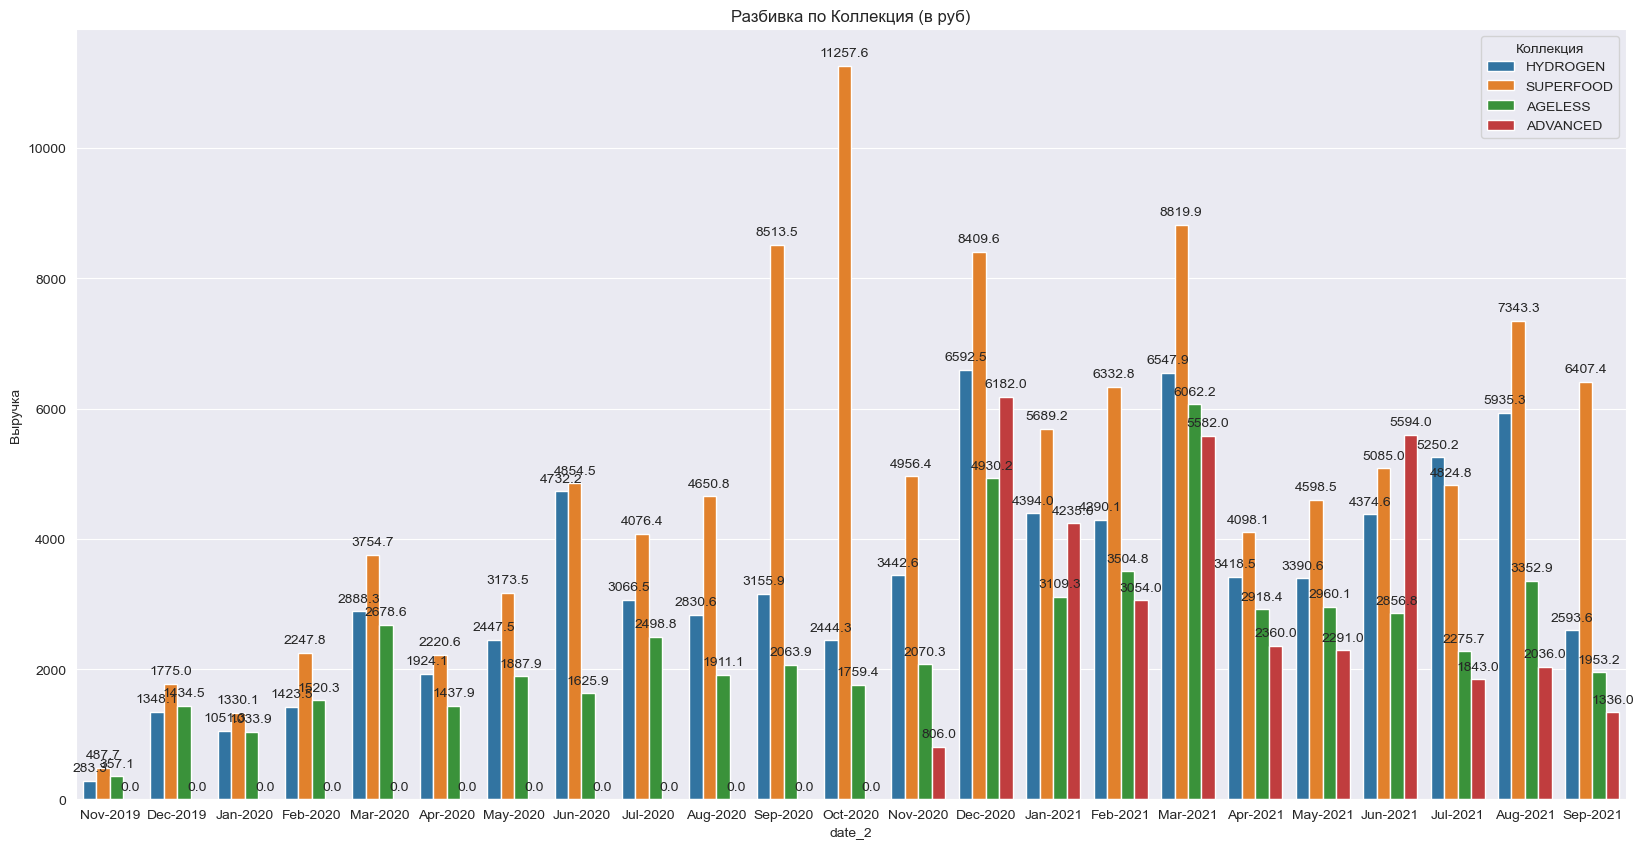

In [15]:
grafik(df_all, 'date_2','Выручка','Коллекция')

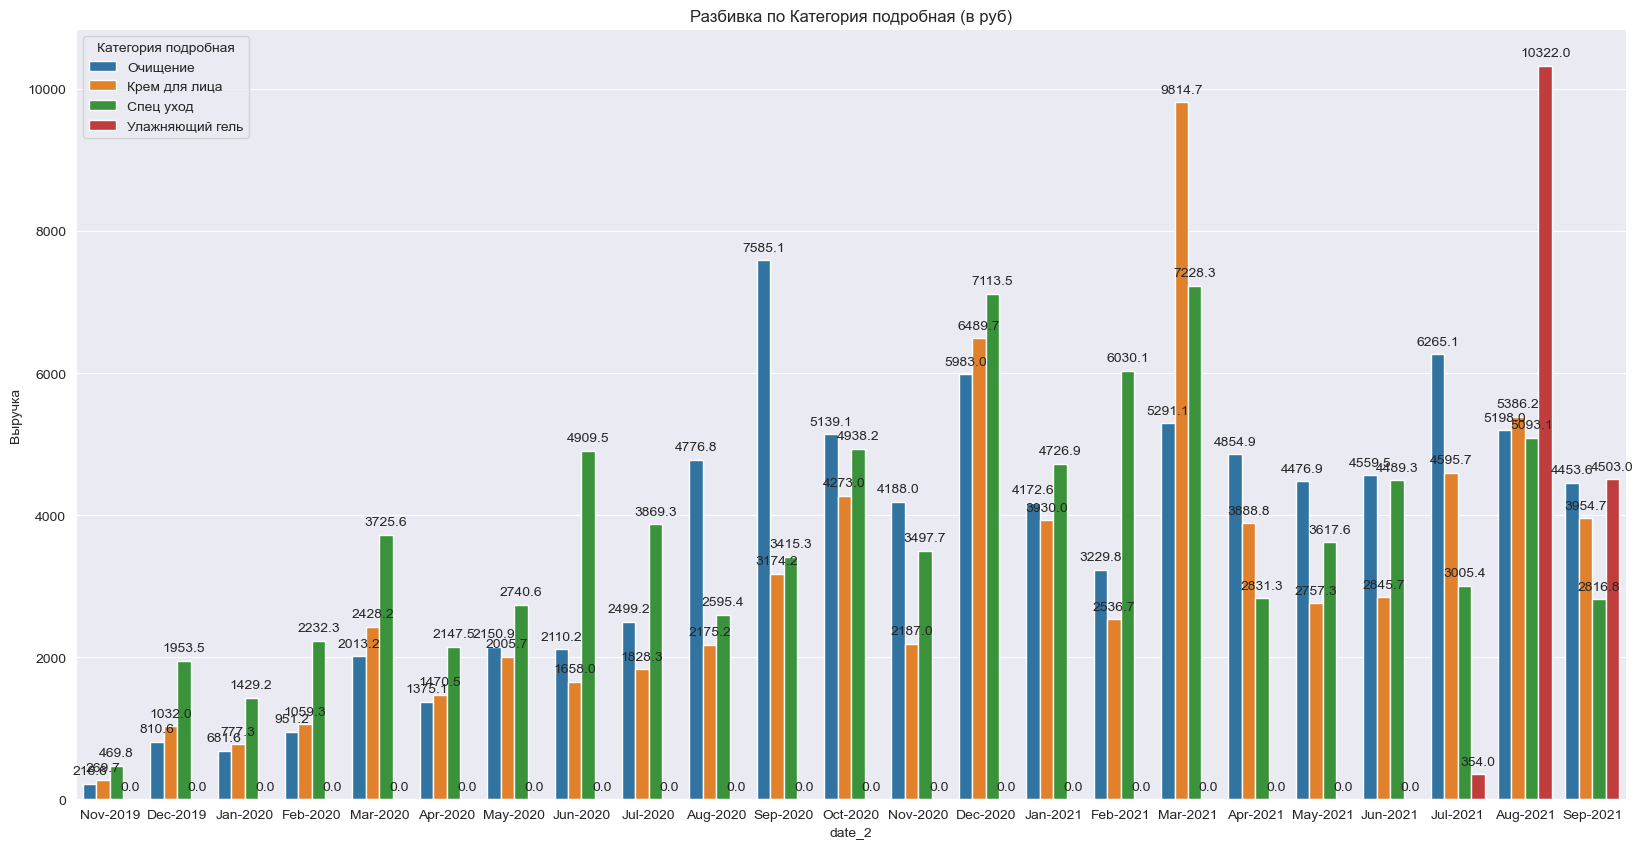

In [16]:
grafik(df_all, 'date_2','Выручка', 'Категория подробная')

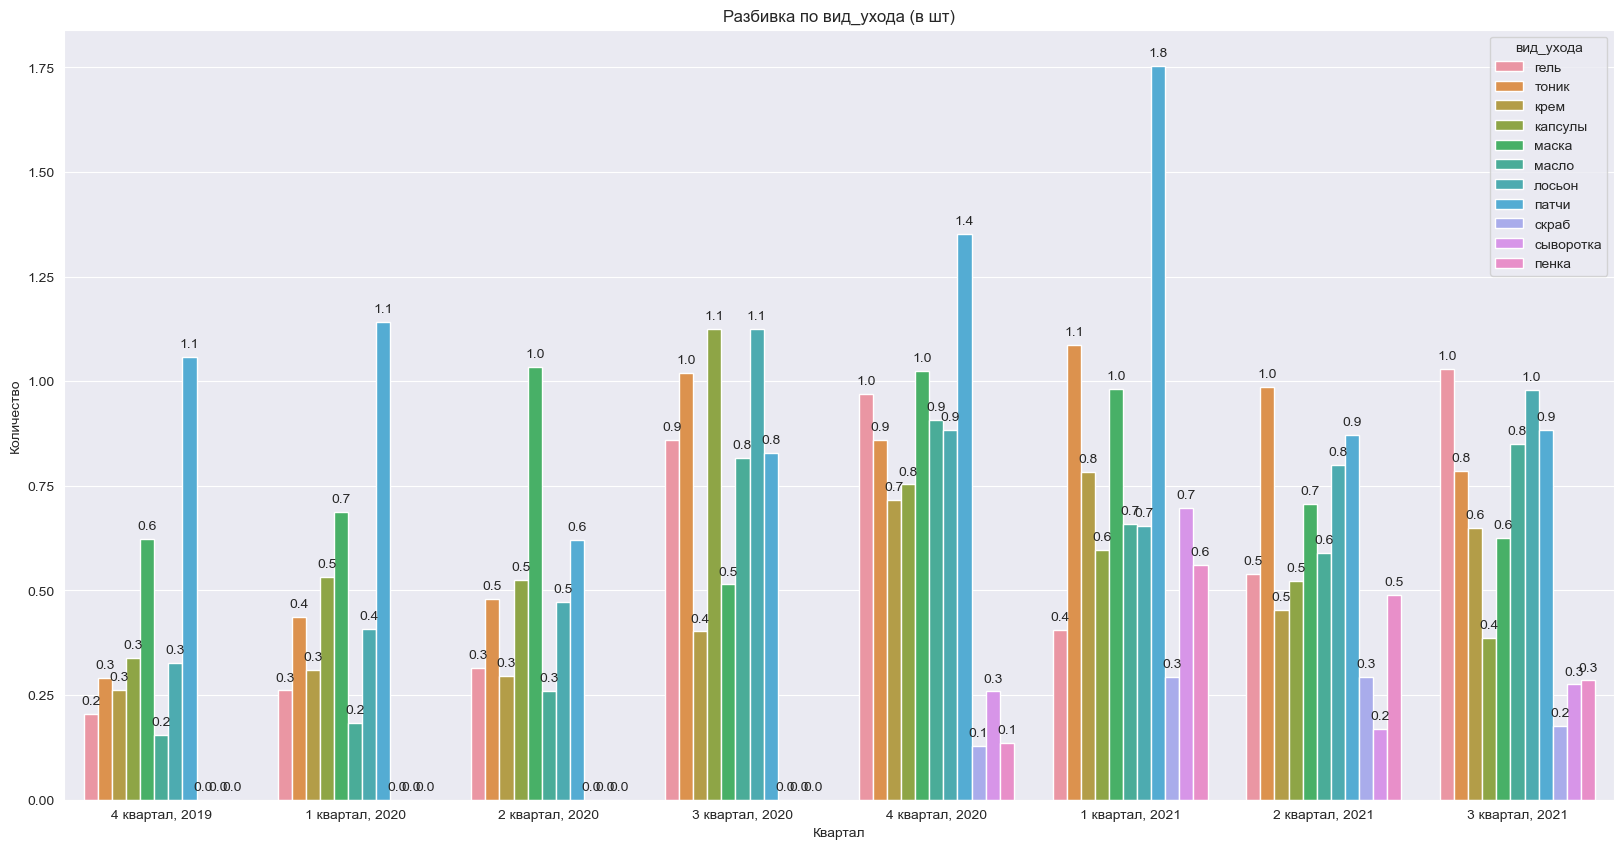

In [17]:
grafik(df_all, 'Квартал','Количество', 'вид_ухода')

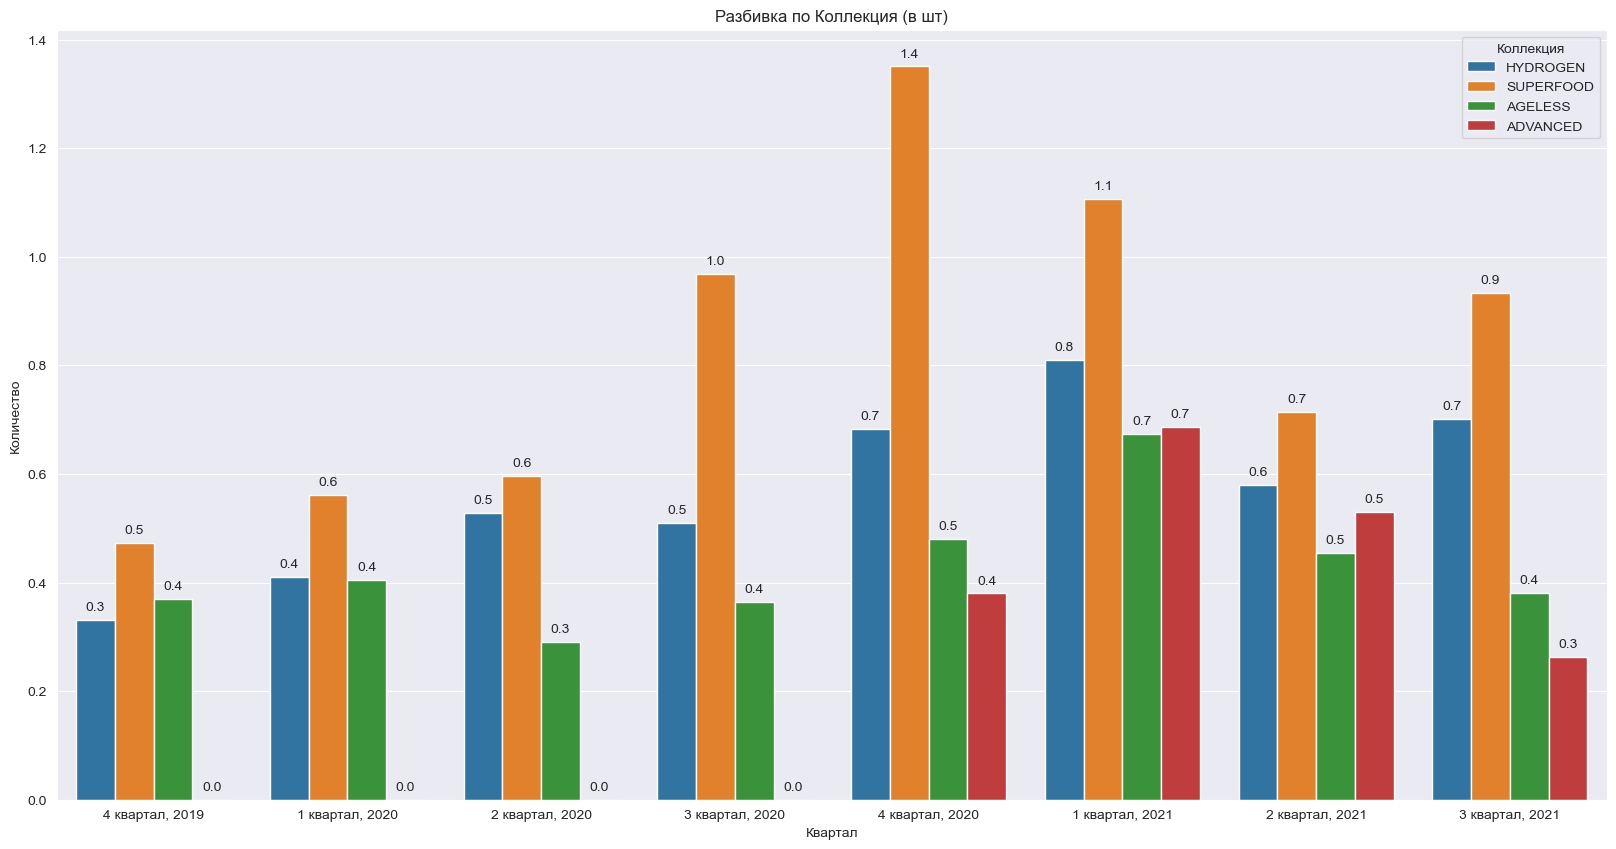

In [18]:
grafik(df_all, 'Квартал','Количество', 'Коллекция')

In [19]:
df = df_all
df.head(2)

,Аббревиатура,код Вектор,код Тандер,НАИМЕНОВАНИЕ,Статус,Признак позиции,Категории для разграничения,Категория,Категория подробная,Коллекция,Выручка,Количество,date,НАИМЕНОВАНИЕ_чистое,вид_ухода,month,year,date_2,Квартал
0,HYDR КРЕМ-Г,SS730101004,1000304734,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ КРЕМ...,базовый,действующий,Лицо,Умывание,Очищение,HYDROGEN,262,0.16,2019-11-01,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ КРЕМ...,гель,11,2019,Nov-2019,"4 квартал, 2019"
1,HYDR ТОНИК,SS730101006,1000304737,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ ТОНИ...,базовый,действующий,Лицо,Тоник,Очищение,HYDROGEN,234,0.14,2019-11-01,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ ТОНИ...,тоник,11,2019,Nov-2019,"4 квартал, 2019"


In [20]:
df_all.columns

Index(['Аббревиатура', 'код Вектор', 'код Тандер', 'НАИМЕНОВАНИЕ', 'Статус',
       'Признак позиции', 'Категории для разграничения', 'Категория',
       'Категория подробная', 'Коллекция', 'Выручка', 'Количество', 'date',
       'НАИМЕНОВАНИЕ_чистое', 'вид_ухода', 'month', 'year', 'date_2',
       'Квартал'],
      dtype='object')

In [21]:
df_all.head(2)

,Аббревиатура,код Вектор,код Тандер,НАИМЕНОВАНИЕ,Статус,Признак позиции,Категории для разграничения,Категория,Категория подробная,Коллекция,Выручка,Количество,date,НАИМЕНОВАНИЕ_чистое,вид_ухода,month,year,date_2,Квартал
0,HYDR КРЕМ-Г,SS730101004,1000304734,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ КРЕМ...,базовый,действующий,Лицо,Умывание,Очищение,HYDROGEN,262,0.16,2019-11-01,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ КРЕМ...,гель,11,2019,Nov-2019,"4 квартал, 2019"
1,HYDR ТОНИК,SS730101006,1000304737,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ ТОНИ...,базовый,действующий,Лицо,Тоник,Очищение,HYDROGEN,234,0.14,2019-11-01,STELLARY SKIN STUDIO HYDROGEN УВЛАЖНЯЮЩИЙ ТОНИ...,тоник,11,2019,Nov-2019,"4 квартал, 2019"


In [22]:
df_group_3 = df_all.groupby(['НАИМЕНОВАНИЕ','Аббревиатура','вид_ухода','Квартал']).agg({'Выручка':'sum','Количество':'sum'})
df_group_3 = df_group_3.reset_index()

In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

df_2 = df_group_3.query('Квартал == "3 квартал, 2021"')


levels = ['Аббревиатура', 'вид_ухода'] # levels used for the hierarchical chart
#color_columns = ['Выручка', 'Количество']
value_column = ['Выручка','Количество']

def build_hierarchical_dataframe(df, levels, value_column):
    """
    Build a hierarchy of levels for Sunburst or Treemap charts.

    Levels are given starting from the bottom to the top of the hierarchy,
    ie the last level corresponds to the root.
    """
    df_all_trees = pd.DataFrame(columns=['id', 'parent', 'value', 'count'])
    for i, level in enumerate(levels):
        df_tree = pd.DataFrame(columns=['id', 'parent', 'value', 'count'])
        dfg = df.groupby(levels[i:]).sum()
        dfg = dfg.reset_index()
        df_tree['id'] = dfg[level].copy()
        if i < len(levels) - 1:
            df_tree['parent'] = dfg[levels[i+1]].copy()
        else:
            df_tree['parent'] = df['Квартал'].iloc[1]
        df_tree['value'] = dfg[value_column[0]]
        df_tree['count'] = dfg[value_column[1]]
        #df_tree['color'] = dfg[color_columns[0]] / dfg[color_columns[1]]
        df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
    total = pd.Series(dict(id=df_2['Квартал'].iloc[1], parent='',
                              value=df[value_column[0]].sum(),
                              count=df[value_column[1]].sum()
                          ))
                              #count=df[v_column].sum(),
                              #color=df[color_columns[0]].sum() / df[color_columns[1]].sum()))
    df_all_trees = df_all_trees.append(total, ignore_index=True)
    return df_all_trees


df_all_trees = build_hierarchical_dataframe(df_2, levels, value_column)

#average_score = df_2['выручка'] / df_2['выручка'].sum()

fig = make_subplots(1, 2, specs=[[{"type": "domain"}, {"type": "domain"}]],)

fig.add_trace(go.Sunburst(
    labels=df_all_trees['id'],
    parents=df_all_trees['parent'],
    values=df_all_trees['value'],
    text = df_all_trees['count'].astype(int),
    branchvalues='total',
    
    hovertemplate='<b>%{label} </b> <br> Выручка: %{value}',
    name=''
    ), 1, 1)

fig.add_trace(go.Sunburst(
    labels=df_all_trees['id'],
    parents=df_all_trees['parent'],
    values=df_all_trees['value'],
    text = df_all_trees['count'].astype(int),
    branchvalues='total',
    
    hovertemplate='<b>%{label} </b> <br> Выручка: %{value}',
    maxdepth=2
    ), 1, 2)

fig.update_layout(margin=dict(t=10, b=10, r=10, l=10))
fig.show()

In [ ]:
grafik(df_all, 'Квартал','Выручка','Коллекция')

In [ ]:
grafik(df_all, 'Квартал','Количество','Коллекция')

In [ ]:
for vid in vid_uhoda:
    df_mask = df_all.query('вид_ухода == "{}"'.format(vid))
    print('График среднемесячных продаж (штуки) "{}" по кварталам'.format(vid))
    grafik(df_mask, 'Квартал','Количество', 'НАИМЕНОВАНИЕ')

In [ ]:
df_mask5 = df_all.query('(вид_ухода == "патчи") & (Квартал == "1 квартал, 2021")')
grafik(df_mask5, 'month','Количество', 'НАИМЕНОВАНИЕ')

!pip install dash

In [29]:
import dash
import plotly.express as px
import pandas as pd
from dash import dcc
from dash import html
from dash.dependencies import Output, Input

app = dash.Dash(__name__)

app.layout=html.Div([
    html.H1("Graph Analysis with Charming Data"),
    dcc.Dropdown(id='genre-choice',
                 options=[{'label':x, 'value':x} for x in sorted(df['вид_ухода'].unique())],
                 value='Action'
                 ),
    dcc.Graph(id='my-graph',
              figure={}),
])
@app.callback(
    Output(component_id='my-graph', component_property='figure'),
    Input(component_id='genre-choice', component_property='value')
)

#nazvanie =

def interactive_graphs(value_genre):
    print(value_genre)
    dff = df[df['вид_ухода']==value_genre]
    fig = px.bar(data_frame=dff, x='Квартал', y='count')
    #fig = px.bar(data_frame=dff, x='Квартал', y='count')
    #fig, ax = plt.subplots(figsize = (20,10), dpi = 100)
    #fig = sns.barplot(data_frame=dff, x='Квартал', y='count', hue = 'НАИМЕНОВАНИЕ', ci = None)  #, orient = 'h')
    return fig


if __name__=='__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Dec/2022 15:33:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2022 15:33:49] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_7_0m1669048794.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2022 15:33:49] "GET /_dash-component-suites/dash/deps/react@16.v2_7_0m1669048794.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2022 15:33:49] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_7_0m1669048794.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2022 15:33:49] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_7_0m1669048794.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2022 15:33:50] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_7_0m1669048794.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2022 15:33:50] "GET /_dash-component-suites/dash/dcc/dash_core_components-shared.v2_7_0m1669048794.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2022 15:33:50] "GET /_dash-component-suites/dash/da

Action
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\dash.py", line 1274, in dispatch
    ctx.run(
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\_callback.py", line 440, in add_context
    output_value = func(*func_args, **func_kwargs)  # %% callback invoked %%
  Fi

127.0.0.1 - - [05/Dec/2022 15:33:50] "POST /_dash-update-component HTTP/1.1" 500 -


капсулы
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\dash.py", line 1274, in dispatch
    ctx.run(
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\_callback.py", line 440, in add_context
    output_value = func(*func_args, **func_kwargs)  # %% callback invoked %%
  F

127.0.0.1 - - [05/Dec/2022 15:33:53] "POST /_dash-update-component HTTP/1.1" 500 -


крем
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\dash.py", line 1274, in dispatch
    ctx.run(
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\_callback.py", line 440, in add_context
    output_value = func(*func_args, **func_kwargs)  # %% callback invoked %%
  File

127.0.0.1 - - [05/Dec/2022 15:33:56] "POST /_dash-update-component HTTP/1.1" 500 -


масло
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\dash.py", line 1274, in dispatch
    ctx.run(
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\_callback.py", line 440, in add_context
    output_value = func(*func_args, **func_kwargs)  # %% callback invoked %%
  Fil

127.0.0.1 - - [05/Dec/2022 15:33:58] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [05/Dec/2022 15:34:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2022 15:34:05] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2022 15:34:05] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2022 15:34:05] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2022 15:34:05] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -


Action
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\dash.py", line 1274, in dispatch
    ctx.run(
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\_callback.py", line 440, in add_context
    output_value = func(*func_args, **func_kwargs)  # %% callback invoked %%
  Fi

127.0.0.1 - - [05/Dec/2022 15:34:05] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [05/Dec/2022 15:34:05] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -


крем
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\dash.py", line 1274, in dispatch
    ctx.run(
  File "C:\Users\venag\anaconda3\envs\tf\lib\site-packages\dash\_callback.py", line 440, in add_context
    output_value = func(*func_args, **func_kwargs)  # %% callback invoked %%
  File

127.0.0.1 - - [05/Dec/2022 15:34:08] "POST /_dash-update-component HTTP/1.1" 500 -


In [30]:
def grafik(df, x, y, hue):
    fig, ax = plt.subplots(figsize = (20,10), dpi = 100)
    ax = sns.barplot(y = y, x = x, data = df, hue = hue, ci = None)  #, orient = 'h')
    if y == 'value':
        z = 'в руб'
    elif y == 'count':
        z = 'в шт'
    else: 
        z = ''
    plt.title('Разбивка по {0} ({1})'.format(hue,z))
    #plt.tick_params(axis ='x', rotation = 90)
    plt.show()